
# Comments on what this notebook does:

+ Loading of different data sets 
+ Declaration of data for the pipelin

# Pipeline for the preparation
+ Fill missing nans with mean of column
+ Get rid of the last remaining columns which seem non relevant 
+ One hot encoding 
+ Droping of category columns 
+ Label Encoding of IT column -> Mapping of categorical variables with many Items 
+ Scaler 
+ Test Train split 

# Models 
+ making of the models 
+ training of the models 
+ prediction with the models 

# Evaluation of Models 
+ RMSE 
+ Residuents 
 

# Import Libraries

In [1]:
# First of all import the required libraries 
# Data and math  
import pandas as pd
import numpy as np 
import pyarrow.parquet as pq

# Visualisation 
import matplotlib.pyplot as plt  # für Matplotlib
import seaborn as sns            # für Seaborn
import plotly.express as px      # für Plotly Express
#%matplotlib inline

# Import System Libraries 
import warnings
import os
# Ignor all warnings, because there is a front problem with mach 
warnings.filterwarnings("ignore")

# Import Machine Learning libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Deciding with with data to work (small, big, only diesel, only petrol)

In [2]:
# Importing Data 
# Path to the neighboring 'data' folder
data_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data'))

In [3]:

# Big Dataframe 
df_big = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_Big.csv'))
print("Shape of tillmanns big df:", df_big.shape)
print(df_big.head())

"""
# Big Diesel only Dataframe 
df_diesel = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_Diesel.csv'))
print("Shape of tillmanns diesel df:", df_diesel.shape)
print(df_diesel.head())

# Big Petrol only Dataframe 
df_petrol = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_Petrol.csv'))
print("Shape of tillmanns petrol df:", df_petrol.shape)
print(df_petrol.head())
"""
"""
# Big Diesel only Dataframe 
df_small = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_Small.csv'))
print("Shape of tillmanns small df:", df_small.shape)
print(df_small.head())


# Big Petrol only Dataframe 
df_smallsmall = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_SmallSmall.csv'))
print("Shape of tillmanns small small df:", df_smallsmall.shape)
print(df_smallsmall.head())
"""

Shape of tillmanns big df: (8095869, 21)
       Mk  Ct  Cr  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)  \
0  SUZUKI  M1  M1  1045.0  1151.0         135.0  2450.0    1510.0    1515.0   
1  SUZUKI  M1  M1   915.0  1051.0         115.0  2450.0    1530.0    1530.0   
2  SUZUKI  M1  M1   915.0  1051.0         115.0  2450.0    1520.0    1520.0   
3   SKODA  M1  M1  1560.0     NaN         146.0  2836.0    1578.0    1566.0   
4     BMW  M1  M1  1490.0  1578.0         149.0  2670.0    1563.0    1562.0   

       Ft  ... ec (cm3)  ep (KW)  z (Wh/km)      IT  De   Vf  ech  RLFI  \
0  PETROL  ...   1373.0    103.0        NaN     NaN NaN  0.0  NaN   NaN   
1  PETROL  ...   1242.0     66.0        NaN     NaN NaN  0.0  NaN   NaN   
2  PETROL  ...   1242.0     66.0        NaN     NaN NaN  0.0  NaN   NaN   
3  DIESEL  ...   1968.0    110.0        NaN     NaN NaN  0.0  NaN   NaN   
4  PETROL  ...   1499.0    103.0        NaN  e24 19 NaN  0.0  NaN   NaN   

   Electric range (km)  #identica

'\n# Big Diesel only Dataframe \ndf_small = pd.read_csv(os.path.join(data_path, \'EU_Tillmann_Small.csv\'))\nprint("Shape of tillmanns small df:", df_small.shape)\nprint(df_small.head())\n\n\n# Big Petrol only Dataframe \ndf_smallsmall = pd.read_csv(os.path.join(data_path, \'EU_Tillmann_SmallSmall.csv\'))\nprint("Shape of tillmanns small small df:", df_smallsmall.shape)\nprint(df_smallsmall.head())\n'

In [4]:
# Declare df for ML data preparation pipeline 
data = df_big
data.head()
print(data.dtypes)

Mk                        object
Ct                        object
Cr                        object
m (kg)                   float64
Mt                       float64
Ewltp (g/km)             float64
W (mm)                   float64
At1 (mm)                 float64
At2 (mm)                 float64
Ft                        object
Fm                        object
ec (cm3)                 float64
ep (KW)                  float64
z (Wh/km)                float64
IT                        object
De                       float64
Vf                       float64
ech                      float64
RLFI                     float64
Electric range (km)      float64
#identical occurences    float64
dtype: object


In [5]:
# Delete columns without meaning for the model
print(data.columns)

# List of columns to be dropped
list_columns_drop = ['Mk', 'Cr', 'ech', 'RLFI', '#identical occurences', 'De', 'Vf']

# Filter only the columns that exist in the DataFrame
existing_columns_to_drop = [col for col in list_columns_drop if col in data.columns]

# Drop the existing columns
if existing_columns_to_drop:
    data.drop(existing_columns_to_drop, axis=1, inplace=True)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("No columns to drop were found in the DataFrame.")

# Display the updated DataFrame
print(data.head())


Index(['Mk', 'Ct', 'Cr', 'm (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)',
       'At2 (mm)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'De',
       'Vf', 'ech', 'RLFI', 'Electric range (km)', '#identical occurences'],
      dtype='object')
Dropped columns: ['Mk', 'Cr', 'ech', 'RLFI', '#identical occurences', 'De', 'Vf']
   Ct  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)      Ft Fm  \
0  M1  1045.0  1151.0         135.0  2450.0    1510.0    1515.0  PETROL  M   
1  M1   915.0  1051.0         115.0  2450.0    1530.0    1530.0  PETROL  M   
2  M1   915.0  1051.0         115.0  2450.0    1520.0    1520.0  PETROL  M   
3  M1  1560.0     NaN         146.0  2836.0    1578.0    1566.0  DIESEL  M   
4  M1  1490.0  1578.0         149.0  2670.0    1563.0    1562.0  PETROL  M   

   ec (cm3)  ep (KW)  z (Wh/km)      IT  Electric range (km)  
0    1373.0    103.0        NaN     NaN                  NaN  
1    1242.0     66.0        NaN     NaN                  NaN  
2  

# 1.A Outlier Handling 

In [6]:
"""
# Recall that Linear Models assume normality. Let's also check how normal the distribution of the num variables are

# Exclude 'year' column and select int64 columns only
numb_columns = data.select_dtypes(include='float64').columns

# Plot histograms to visualize distribution of each int64 column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numb_columns, 1):
    plt.subplot(len(numb_columns) // 3 + 1, 3, i)  # Creating subplots
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()
"""

"\n# Recall that Linear Models assume normality. Let's also check how normal the distribution of the num variables are\n\n# Exclude 'year' column and select int64 columns only\nnumb_columns = data.select_dtypes(include='float64').columns\n\n# Plot histograms to visualize distribution of each int64 column\nplt.figure(figsize=(15, 10))\nfor i, column in enumerate(numb_columns, 1):\n    plt.subplot(len(numb_columns) // 3 + 1, 3, i)  # Creating subplots\n    sns.histplot(data[column], kde=True)\n    plt.title(f'Distribution of {column}')\n    plt.tight_layout()\nplt.show()\n"

In [7]:
"""
from scipy.stats import shapiro

#  Define a function to check normality using Shapiro-Wilk test
def check_gaussian_columns(df, alpha=1):
    gaussian_columns = []
    non_gaussian_columns = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Check only numeric columns
            stat, p_value = shapiro(df[col].dropna())  # Perform the test
            
            # Check if the p-value is greater than alpha (fail to reject the null hypothesis)
            if p_value > alpha:
                gaussian_columns.append(col)
            else:
                non_gaussian_columns.append(col)
                
    return gaussian_columns, non_gaussian_columns

# Apply the function on your DataFrame
gaussian_cols, non_gaussian_cols = check_gaussian_columns(data)

# Print the results
print("Nearly Gaussian Distributed Columns:", gaussian_cols)
print("Non-Gaussian Distributed Columns:", non_gaussian_cols)
"""

'\nfrom scipy.stats import shapiro\n\n#  Define a function to check normality using Shapiro-Wilk test\ndef check_gaussian_columns(df, alpha=1):\n    gaussian_columns = []\n    non_gaussian_columns = []\n\n    for col in df.columns:\n        if pd.api.types.is_numeric_dtype(df[col]):  # Check only numeric columns\n            stat, p_value = shapiro(df[col].dropna())  # Perform the test\n            \n            # Check if the p-value is greater than alpha (fail to reject the null hypothesis)\n            if p_value > alpha:\n                gaussian_columns.append(col)\n            else:\n                non_gaussian_columns.append(col)\n                \n    return gaussian_columns, non_gaussian_columns\n\n# Apply the function on your DataFrame\ngaussian_cols, non_gaussian_cols = check_gaussian_columns(data)\n\n# Print the results\nprint("Nearly Gaussian Distributed Columns:", gaussian_cols)\nprint("Non-Gaussian Distributed Columns:", non_gaussian_cols)\n'

In [8]:
# Since the near gaussian distribution test is not working I am declaring them by visual: 
gaussian_cols = ['m (kg)', 'Mt',  'W (mm)', 'At1 (mm)', 'At2 (mm)',  'z (Wh/km)', 'Electric range (km)']
non_gaussian_cols = [ 'ec (cm3)', 'ep (KW)']

In [9]:
# Assuming gaussian_cols is already defined (e.g., from the Shapiro-Wilk test)
# Make median method for columns which are gaussian distributed
Q1 = data[gaussian_cols].quantile(0.25)
Q3 = data[gaussian_cols].quantile(0.75)
IQR = Q3 - Q1

# Define conditions to identify outliers based on IQR only for Gaussian columns
outlier_condition = ((data[gaussian_cols] < (Q1 - 1.5 * IQR)) | 
                     (data[gaussian_cols] > (Q3 + 1.5 * IQR)))

# Replace outliers with the median of their respective columns
for col in gaussian_cols:
    median_value = data[col].median()  # Calculate the median for the column
    data.loc[outlier_condition[col], col] = median_value  # Replace outliers with the median

print(f"DataFrame shape after replacing outliers in Gaussian columns: {data.shape}")



DataFrame shape after replacing outliers in Gaussian columns: (8095869, 14)


In [10]:
# For non gaussian distributed columns 
def iqr_outlier_removal(df):
    outliers_removed = df.copy()
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Only numeric columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Remove or cap outliers outside the range
            outliers_removed[col] = np.where(df[col] < lower_bound, lower_bound,
                                             np.where(df[col] > upper_bound, upper_bound, df[col]))
    
    return outliers_removed

# Apply to your DataFrame
df_no_outliers = iqr_outlier_removal(data)


#  1.C The problem of the IT columb solving the mapping to be able to do OneHot Encoding 

+ separate column into IT_missing, IT capital E and IT small e 
+ One Hot encoding of e_small and E_capital 
+ deleting of the 

In [11]:
# Check the current dtype
print(data['IT'].dtype)

# Define the function to extract the first part of the string and handle non-'e'/'E' values
def extract_first_part(s):
    if isinstance(s, str):  # Check if the value is a string
        s = s.strip()  # Strip any leading/trailing whitespace
        if not s:  # If the string is empty
            return np.nan  # Replace empty string with NaN
        
        if s[0].lower() == 'e':  # Check if the string starts with 'e' or 'E'
            first_part = s[0:3]  # Keep the first three characters
            if len(first_part) > 2 and first_part[1:].isdigit():  # Ensure it’s followed by digits
                return first_part  # Return 'e12', 'E23', etc.
            else:
                return np.nan  # Replace malformed entries like 'e' with NaN
        else:
            return np.nan  # Replace any string that doesn’t start with 'e' or 'E' with NaN
    return s  # Return the original value (NaN) if it's not a string

# Apply the function to the specified column while keeping existing NaNs
data['IT'] = data['IT'].apply(extract_first_part)

# Display the modified DataFrame
print(data['IT'])


object
0          NaN
1          NaN
2          NaN
3          NaN
4          e24
          ... 
8095864    NaN
8095865    NaN
8095866    e24
8095867    NaN
8095868    e24
Name: IT, Length: 8095869, dtype: object


In [12]:
# Get unique values in 'IT' column
unique_IT_values = data['IT'].unique()
print(unique_IT_values)

[nan 'e24' 'e11' 'e13' 'E24' 'E13' 'E19' 'E11' 'E12' 'e19' 'e29' 'e17'
 'e34' 'e20' 'e12' 'e27' 'e51' 'e22' 'e21' 'E17' 'E22' 'e91' 'E41' 'E51'
 'E25' 'E27' 'e01' 'e14' 'E20' 'e25' 'e61' 'E14' 'e41' 'E16' 'E36' 'e36'
 'e81' 'e23' 'e42' 'e33' 'E52' 'E53' 'e26' 'E29' 'e16' 'e28' 'e32' 'E37'
 'E62' 'E63' 'E32' 'e62' 'E93' 'E92' 'E18' 'E26' 'E61']


In [13]:
import re
# Analyzing the IT column 
# Create IT_Number column that extracts numbers after 'e' or 'E'
def extract_number(s):
    if isinstance(s, str) and (s.startswith('e') or s.startswith('E')):
        return re.search(r'\d+', s).group()  # Extract numeric part after e or E
    return np.nan  # Return NaN if the conditions are not met

# Apply the function to create the IT_Number column
data['IT_Number'] = data['IT'].apply(extract_number)

# Display the modified DataFrame
print(data)


         Ct  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)      Ft  \
0        M1  1045.0  1151.0         135.0  2450.0    1510.0    1515.0  PETROL   
1        M1   915.0  1051.0         115.0  2450.0    1530.0    1530.0  PETROL   
2        M1   915.0  1051.0         115.0  2450.0    1520.0    1520.0  PETROL   
3        M1  1560.0     NaN         146.0  2836.0    1578.0    1566.0  DIESEL   
4        M1  1490.0  1578.0         149.0  2670.0    1563.0    1562.0  PETROL   
...      ..     ...     ...           ...     ...       ...       ...     ...   
8095864  M1  1140.0  1257.0         119.0  2580.0    1531.0    1536.0  PETROL   
8095865  M1  1500.0  1619.0         151.0  2680.0    1615.0    1622.0  PETROL   
8095866  M1  1730.0  1902.0         164.0  2851.0    1573.0    1587.0  PETROL   
8095867  M1  1456.0  1537.0         133.0  2720.0    1562.0    1584.0  PETROL   
8095868  M1  1940.0  2126.0         147.0  2975.0    1605.0    1630.0  DIESEL   

        Fm  ec (cm3)  ep (K

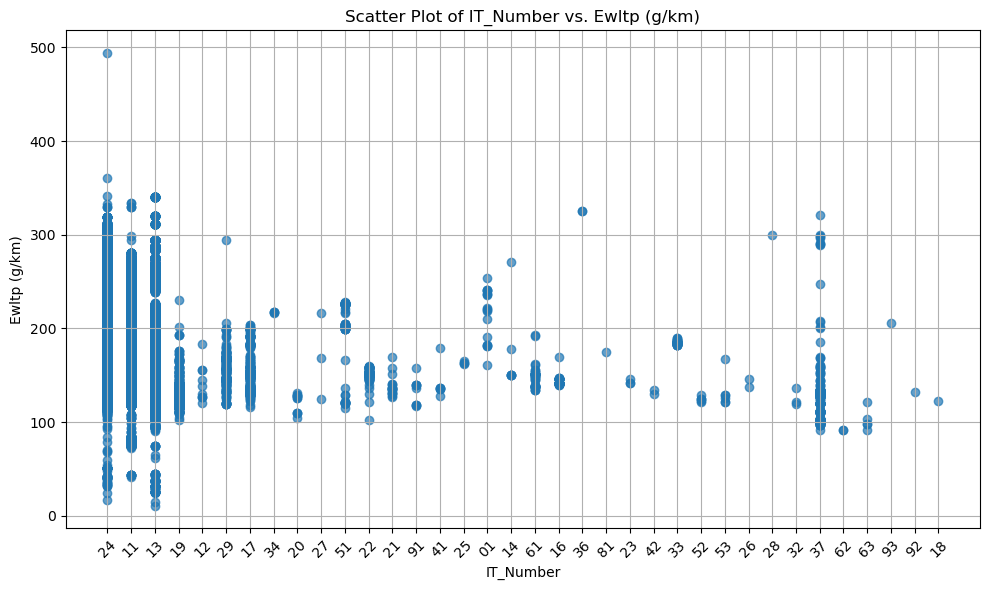

In [14]:
# Plotting of IT column vs CO2 emission - to see if there is a correlation 
# Drop rows with NaN values in either 'IT_Number' or 'Ewltp (g/km)'
filtered_data = data.dropna(subset=['IT_Number', 'Ewltp (g/km)'])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['IT_Number'], filtered_data['Ewltp (g/km)'], alpha=0.7)
plt.title('Scatter Plot of IT_Number vs. Ewltp (g/km)')
plt.xlabel('IT_Number')
plt.ylabel('Ewltp (g/km)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-ticks if needed for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()

+ IT number has no correlation with CO2 emission, so we make a simple one hot encoding and generate a lot of columns 
+ also with one IT-number missing column 

In [15]:
# Drop the 'IT_Number' column, it has no meaning
data.drop(columns=['IT_Number'], inplace=True)

In [16]:
data.columns

Index(['Ct', 'm (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)',
       'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT',
       'Electric range (km)'],
      dtype='object')

# 1. C Hanlding of non electric cars

In [17]:
# If there is a nan in Electric range or a nan in z
# Create the Non_Electric column: 1 if both Electric range OR z (Wh/km) are NaN, otherwise 0
data['Non_Electric'] = (data['Electric range (km)'].isna() & data['z (Wh/km)'].isna()).astype(int)

# Fill NaN values in Electric range (km) and z (Wh/km) with 0
data['Electric range (km)'].fillna(0, inplace=True)
data['z (Wh/km)'].fillna(0, inplace=True)

# Display the updated DataFrame
print(data)

         Ct  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)      Ft  \
0        M1  1045.0  1151.0         135.0  2450.0    1510.0    1515.0  PETROL   
1        M1   915.0  1051.0         115.0  2450.0    1530.0    1530.0  PETROL   
2        M1   915.0  1051.0         115.0  2450.0    1520.0    1520.0  PETROL   
3        M1  1560.0     NaN         146.0  2836.0    1578.0    1566.0  DIESEL   
4        M1  1490.0  1578.0         149.0  2670.0    1563.0    1562.0  PETROL   
...      ..     ...     ...           ...     ...       ...       ...     ...   
8095864  M1  1140.0  1257.0         119.0  2580.0    1531.0    1536.0  PETROL   
8095865  M1  1500.0  1619.0         151.0  2680.0    1615.0    1622.0  PETROL   
8095866  M1  1730.0  1902.0         164.0  2851.0    1573.0    1587.0  PETROL   
8095867  M1  1456.0  1537.0         133.0  2720.0    1562.0    1584.0  PETROL   
8095868  M1  1940.0  2126.0         147.0  2975.0    1605.0    1630.0  DIESEL   

        Fm  ec (cm3)  ep (K

# 1.B Handle missing values (if any)


In [18]:

# Check summary (prenving that missing values have been re-introduced)

# Get the data types of each column
data_types = data.dtypes

# Get the number of unique values for each categorical column
unique_values = data.select_dtypes(include=['category', 'object']).nunique()

# Get the percentage of missing values for each column
missing_values = data.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values, 'Missing Values (%)': missing_values})

# Sort the DataFrame by 'Data Type' to group by data type
summary_df = summary_df.sort_values(by='Data Type')

# Print the summary DataFrame
print(summary_df)

data.shape

                    Data Type  Unique Values  Missing Values (%)
Non_Electric            int64            NaN            0.000000
At1 (mm)              float64            NaN            0.000000
At2 (mm)              float64            NaN            0.000000
Electric range (km)   float64            NaN            0.000000
Ewltp (g/km)          float64            NaN            0.000000
Mt                    float64            NaN            3.083671
W (mm)                float64            NaN            0.000000
ec (cm3)              float64            NaN            0.000000
ep (KW)               float64            NaN            0.000000
m (kg)                float64            NaN            0.036302
z (Wh/km)             float64            NaN            0.000000
Ct                     object            6.0            0.000062
Fm                     object            6.0            0.000222
Ft                     object            9.0            0.004249
IT                     ob

(8095869, 15)

+ Fill nans with mean for numerical variables 

In [19]:
# Drop rows with NaN values in numeric columns (float64 or int64)
data.dropna(subset=data.select_dtypes(include=['float64', 'int64']).columns, inplace=True)

# Display the modified DataFrame to verify the changes
print(data)

         Ct  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)      Ft  \
0        M1  1045.0  1151.0         135.0  2450.0    1510.0    1515.0  PETROL   
1        M1   915.0  1051.0         115.0  2450.0    1530.0    1530.0  PETROL   
2        M1   915.0  1051.0         115.0  2450.0    1520.0    1520.0  PETROL   
4        M1  1490.0  1578.0         149.0  2670.0    1563.0    1562.0  PETROL   
5        M1  1490.0  1581.0         150.0  2670.0    1563.0    1562.0  PETROL   
...      ..     ...     ...           ...     ...       ...       ...     ...   
8095864  M1  1140.0  1257.0         119.0  2580.0    1531.0    1536.0  PETROL   
8095865  M1  1500.0  1619.0         151.0  2680.0    1615.0    1622.0  PETROL   
8095866  M1  1730.0  1902.0         164.0  2851.0    1573.0    1587.0  PETROL   
8095867  M1  1456.0  1537.0         133.0  2720.0    1562.0    1584.0  PETROL   
8095868  M1  1940.0  2126.0         147.0  2975.0    1605.0    1630.0  DIESEL   

        Fm  ec (cm3)  ep (K

+ fill nans with 'Missing' for the categorical variables

In [20]:
print(data.dtypes)

# Automatically find categorical columns (object or category dtype)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Replace NaNs in each categorical column with 'Missing'
data[categorical_columns] = data[categorical_columns].fillna('Missing')
# Check for NaN values in X_train
nans = data.isna().sum()

# Filter and print columns with NaN values
nans_with_values = nans[nans > 0]
print(f"Columns with NaN values in:\n{nans_with_values}")


Ct                      object
m (kg)                 float64
Mt                     float64
Ewltp (g/km)           float64
W (mm)                 float64
At1 (mm)               float64
At2 (mm)               float64
Ft                      object
Fm                      object
ec (cm3)               float64
ep (KW)                float64
z (Wh/km)              float64
IT                      object
Electric range (km)    float64
Non_Electric             int64
dtype: object
Columns with NaN values in:
Series([], dtype: int64)


In [21]:
# Solving the nan problem 
print(data.columns)
# Check for NaN values in X_train
nans = data.isna().sum()
# Filter and print columns with NaN values
nans_with_values = nans[nans > 0]
print(f"Columns with NaN values in:\n{nans_with_values}")
print(data.tail())

Index(['Ct', 'm (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)',
       'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT',
       'Electric range (km)', 'Non_Electric'],
      dtype='object')
Columns with NaN values in:
Series([], dtype: int64)
         Ct  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)      Ft  \
8095864  M1  1140.0  1257.0         119.0  2580.0    1531.0    1536.0  PETROL   
8095865  M1  1500.0  1619.0         151.0  2680.0    1615.0    1622.0  PETROL   
8095866  M1  1730.0  1902.0         164.0  2851.0    1573.0    1587.0  PETROL   
8095867  M1  1456.0  1537.0         133.0  2720.0    1562.0    1584.0  PETROL   
8095868  M1  1940.0  2126.0         147.0  2975.0    1605.0    1630.0  DIESEL   

        Fm  ec (cm3)  ep (KW)  z (Wh/km)       IT  Electric range (km)  \
8095864  M     998.0     74.0        0.0  Missing                  0.0   
8095865  M    1598.0    110.0        0.0  Missing                  0.0   
8095866  M    1998.0    190.0

In [22]:
# List of problematic categorical columns
columns_category = ['Ct', 'Ft', 'Fm', 'IT']

# Loop through each column and print unique values
for col in columns_category:
    if col in data.columns:
        unique_values = data[col].unique()
        print(f"Unique values in column '{col}':\n{unique_values}\n")
    else:
        print(f"Column '{col}' does not exist in the DataFrame, skipping...\n")

Unique values in column 'Ct':
['M1' 'M1G' 'N1' 'N1G' 'Missing' 'N2' 'N2G']

Unique values in column 'Ft':
['PETROL' 'DIESEL' 'PETROL/ELECTRIC' 'NG-BIOMETHANE' 'LPG' 'Missing'
 'DIESEL/ELECTRIC' 'E85' 'HYDROGEN' 'ELECTRIC']

Unique values in column 'Fm':
['M' 'B' 'F' 'H' 'P' 'Missing' 'E']

Unique values in column 'IT':
['Missing' 'e24' 'e11' 'e13' 'E24' 'E13' 'E19' 'E11' 'E12' 'e19' 'e29'
 'e17' 'e34' 'e20' 'e12' 'e27' 'e51' 'e22' 'e21' 'E17' 'E22' 'e91' 'E41'
 'E51' 'E27' 'e01' 'e14' 'E20' 'e25' 'e61' 'E14' 'e41' 'E16' 'E36' 'E25'
 'e23' 'e42' 'e33' 'E52' 'E53' 'e26' 'E29' 'e16' 'e28' 'e32' 'E37' 'E63'
 'E93' 'E92' 'E18' 'E26' 'E61']



# 2. One-hot encode categorical variables

In [23]:
data.tail()

,Ct,m (kg),Mt,Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Electric range (km),Non_Electric
8095864,M1,1140.0,1257.0,119.0,2580.0,1531.0,1536.0,PETROL,M,998.0,74.0,0.0,Missing,0.0,1
8095865,M1,1500.0,1619.0,151.0,2680.0,1615.0,1622.0,PETROL,M,1598.0,110.0,0.0,Missing,0.0,1
8095866,M1,1730.0,1902.0,164.0,2851.0,1573.0,1587.0,PETROL,M,1998.0,190.0,0.0,e24,0.0,1
8095867,M1,1456.0,1537.0,133.0,2720.0,1562.0,1584.0,PETROL,H,1332.0,103.0,0.0,Missing,0.0,1
8095868,M1,1940.0,2126.0,147.0,2975.0,1605.0,1630.0,DIESEL,H,2993.0,210.0,0.0,e24,0.0,1


In [24]:
# List of columns to be one-hot encoded
columns_to_encode = ['Ct', 'Ft', 'Fm', 'IT']

# Filter only the columns that exist in the DataFrame
existing_columns_to_encode = [col for col in columns_to_encode if col in data.columns]
print(existing_columns_to_encode)

if existing_columns_to_encode:
    # Check for NaNs in the columns to encode
    for col in existing_columns_to_encode:
        if data[col].isna().any():
            # Fill NaNs with a placeholder value, e.g., 'Missing'
            data[col].fillna('Missing', inplace=True)

    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

    # Fit and transform the existing columns
    encoded_features = encoder.fit_transform(data[existing_columns_to_encode])

    # Convert the encoded features into a DataFrame with meaningful column names
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(existing_columns_to_encode))

    # Concatenate the new one-hot encoded columns back to the original DataFrame (drop the original columns first)
    data_new = pd.concat([data.drop(existing_columns_to_encode, axis=1), encoded_df], axis=1)

    # Display the updated DataFrame
    print(data_new.head())
    print(data_new.tail())
else:
    print("No columns to encode were found in the DataFrame.")

data = data_new


['Ct', 'Ft', 'Fm', 'IT']


KeyboardInterrupt: 

In [132]:
print(data.shape)
# Print all rows where there are NaN values
print(data[data.isna().any(axis=1)])
data = data_new.dropna()

(80959, 39)
Empty DataFrame
Columns: [m (kg), Mt, Ewltp (g/km), W (mm), At1 (mm), At2 (mm), ec (cm3), ep (KW), z (Wh/km), Electric range (km), Non_Electric, Ct_M1G, Ct_N1, Ct_N1G, Ft_DIESEL/ELECTRIC, Ft_E85, Ft_LPG, Ft_Missing, Ft_NG-BIOMETHANE, Ft_PETROL, Ft_PETROL/ELECTRIC, Fm_F, Fm_H, Fm_M, Fm_P, IT_E13, IT_E17, IT_E19, IT_E24, IT_E37, IT_Missing, IT_e11, IT_e13, IT_e17, IT_e19, IT_e20, IT_e24, IT_e29, IT_e51]
Index: []

[0 rows x 39 columns]


# 2. D Saving the data after all preparations for the modelization 

In [133]:

# Saving the data 
data.to_csv(os.path.join(data_path, 'EU_Tillmann__ModelData_Big.csv'), index=False)

print("Shape of data:", data.shape)
print("Data in the data_path.")


Shape of data: (80959, 39)
Data in the data_path.


# 3 Check for correlation

In [134]:
# Assuming 'data' is your DataFrame
# Generate a correlation matrix
# correlation_matrix = data.corr()

'\n\n# Get unique values in \'IT\' column\nunique_IT_values = data[\'IT\'].unique()\n\n# Create a mapping from categorical values to numerical values\nIT_mapping = {category: idx for idx, category in enumerate(unique_IT_values)}\n\n# Print the mapping (for reference)\nprint("Mapping of IT categories to numerical values:")\nprint(IT_mapping)\n\n# Apply the mapping to the \'IT\' column\ndata[\'IT_mapped\'] = data[\'IT\'].map(IT_mapping)\n\n# Now \'IT_mapped\' will contain the numerical representation of the \'IT\' column\nprint(data[[\'IT\', \'IT_mapped\']].head())\n\n# Later, to reverse the mapping, you can do:\nreverse_IT_mapping = {v: k for k, v in IT_mapping.items()}\n\n\n'

In [ ]:
# Set up the matplotlib figure
# plt.figure(figsize=(12, 8))

# Draw the heatmap
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
# plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
# plt.show()


# 4. Split the data into features and target



In [135]:
# 
X = data.drop('Ewltp (g/km)', axis=1)  # Features
y = data['Ewltp (g/km)']               # Target variable

# Check for NaN values in X_train
nans = X.isna().sum()

# Filter and print columns with NaN values
nans_with_values = nans[nans > 0]
print(f"Columns with NaN values in X_train:\n{nans_with_values}")

print(X.shape)

Columns with NaN values in X_train:
Series([], dtype: int64)
(80959, 38)


In [136]:

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [137]:

# 5. Normalize/Standardize features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Standardize features by removing the mean and scaling to unit variance
X_test_scaled = scaler.fit_transform(X_test)



In [138]:

# 6. Train a regression model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [139]:

# 7. Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [140]:
# Calculate and print the score
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print(f"Training score: {train_score:.4f}")
print(f"Test score: {test_score:.4f}")

Training score: 0.8631
Test score: 0.8569


In [141]:

# 8. Evaluate the model performance (using Mean Squared Error in this case)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 298.94768518628024


# 5 Documentation of the results: 
+ Small df: 
++ Training score: 0.8631
++ Test score: 0.8569
++ Mean Squared Error: 298.94768518628024

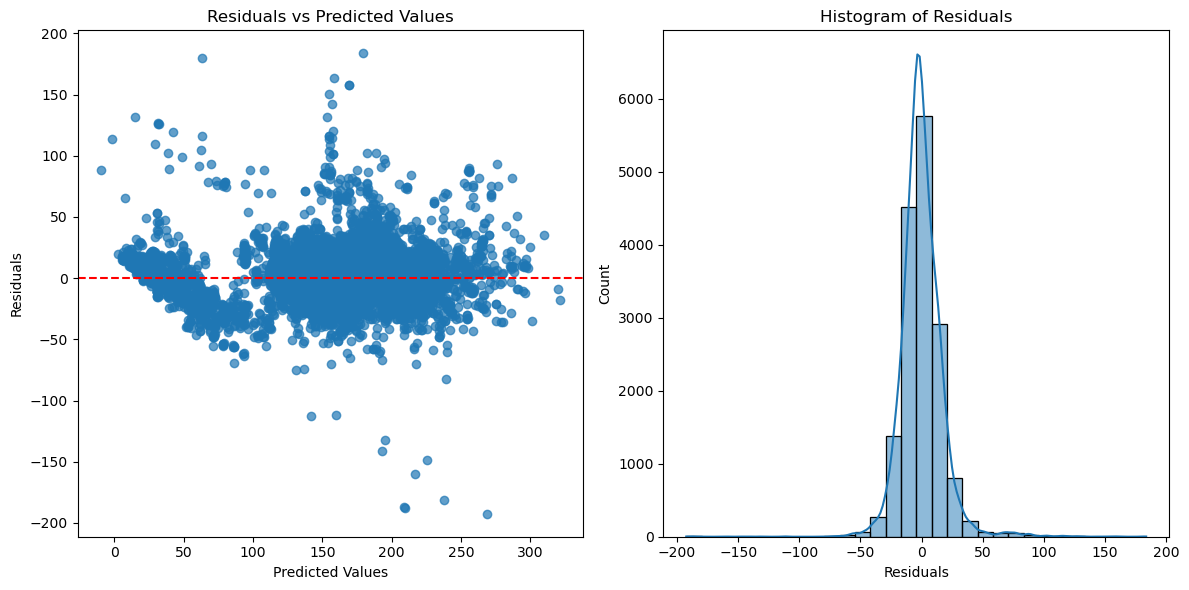

In [143]:

# Calculate residuals
residuals = y_test - y_pred

# Create a figure
plt.figure(figsize=(12, 6))

# Scatter plot of residuals vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)  # Kernel Density Estimate for smoother curve
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# Show plots
plt.tight_layout()
plt.show()

In [144]:
# I have to get rid of the outliers, there should be a quantile transformation before head 

In [145]:
a = 2 
b = 3 


In [146]:
print(a)
print(b)

2
3


In [147]:
c = b

In [148]:
print(c)

3
